In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np



In [2]:

# Load the dataset
file_path = r"C:\Users\LENOVO\Downloads\Skills Migration\skill_migration_public.csv"
df = pd.read_csv(file_path)

df.head()

,country_code,country_name,wb_income,wb_region,skill_group_id,skill_group_category,skill_group_name,net_per_10K_2015,net_per_10K_2016,net_per_10K_2017,net_per_10K_2018,net_per_10K_2019
0,af,Afghanistan,Low income,South Asia,2549,Tech Skills,Information Management,-791.59,-705.88,-550.04,-680.92,-1208.79
1,af,Afghanistan,Low income,South Asia,2608,Business Skills,Operational Efficiency,-1610.25,-933.55,-776.06,-532.22,-790.09
2,af,Afghanistan,Low income,South Asia,3806,Specialized Industry Skills,National Security,-1731.45,-769.68,-756.59,-600.44,-767.64
3,af,Afghanistan,Low income,South Asia,50321,Tech Skills,Software Testing,-957.50,-828.54,-964.73,-406.50,-739.51
4,af,Afghanistan,Low income,South Asia,1606,Specialized Industry Skills,Navy,-1510.71,-841.17,-842.32,-581.71,-718.64


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17617 entries, 0 to 17616
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country_code          17617 non-null  object 
 1   country_name          17617 non-null  object 
 2   wb_income             17617 non-null  object 
 3   wb_region             17617 non-null  object 
 4   skill_group_id        17617 non-null  int64  
 5   skill_group_category  17617 non-null  object 
 6   skill_group_name      17617 non-null  object 
 7   net_per_10K_2015      17617 non-null  float64
 8   net_per_10K_2016      17617 non-null  float64
 9   net_per_10K_2017      17617 non-null  float64
 10  net_per_10K_2018      17617 non-null  float64
 11  net_per_10K_2019      17617 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 1.6+ MB


In [4]:
# Filter data for years 2015 to 2019
years = ["net_per_10K_2015", "net_per_10K_2016", "net_per_10K_2017", "net_per_10K_2018", "net_per_10K_2019"]
filtered_df = df[["country_name", "skill_group_category", *years]]


filtered_df.head()


,country_name,skill_group_category,net_per_10K_2015,net_per_10K_2016,net_per_10K_2017,net_per_10K_2018,net_per_10K_2019
0,Afghanistan,Tech Skills,-791.59,-705.88,-550.04,-680.92,-1208.79
1,Afghanistan,Business Skills,-1610.25,-933.55,-776.06,-532.22,-790.09
2,Afghanistan,Specialized Industry Skills,-1731.45,-769.68,-756.59,-600.44,-767.64
3,Afghanistan,Tech Skills,-957.50,-828.54,-964.73,-406.50,-739.51
4,Afghanistan,Specialized Industry Skills,-1510.71,-841.17,-842.32,-581.71,-718.64


In [5]:
# Drop rows with missing values
filtered_df = filtered_df.dropna()
filtered_df.head()


,country_name,skill_group_category,net_per_10K_2015,net_per_10K_2016,net_per_10K_2017,net_per_10K_2018,net_per_10K_2019
0,Afghanistan,Tech Skills,-791.59,-705.88,-550.04,-680.92,-1208.79
1,Afghanistan,Business Skills,-1610.25,-933.55,-776.06,-532.22,-790.09
2,Afghanistan,Specialized Industry Skills,-1731.45,-769.68,-756.59,-600.44,-767.64
3,Afghanistan,Tech Skills,-957.50,-828.54,-964.73,-406.50,-739.51
4,Afghanistan,Specialized Industry Skills,-1510.71,-841.17,-842.32,-581.71,-718.64


In [13]:
# Add average net migration feature
filtered_df["average_net_migration"] = filtered_df[years].mean(axis=1)
filtered_df.head()

,country_name,skill_group_category,net_per_10K_2015,net_per_10K_2016,net_per_10K_2017,net_per_10K_2018,net_per_10K_2019,average_net_migration
0,Afghanistan,Tech Skills,-791.59,-705.88,-550.04,-680.92,-1208.79,-787.444
1,Afghanistan,Business Skills,-1610.25,-933.55,-776.06,-532.22,-790.09,-928.434
2,Afghanistan,Specialized Industry Skills,-1731.45,-769.68,-756.59,-600.44,-767.64,-925.160
3,Afghanistan,Tech Skills,-957.50,-828.54,-964.73,-406.50,-739.51,-779.356
4,Afghanistan,Specialized Industry Skills,-1510.71,-841.17,-842.32,-581.71,-718.64,-898.910


In [15]:
# Define features (X) and target (y)
features = ["net_per_10K_2015", "net_per_10K_2016", "net_per_10K_2017", "net_per_10K_2018", "average_net_migration"]
X = filtered_df[features]
y = filtered_df["net_per_10K_2019"]

In [17]:
# Ensure the lengths of X and y are consistent
print(f"Length of X: {len(X)}, Length of y: {len(y)}")

Length of X: 17617, Length of y: 17617


In [23]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test

(       net_per_10K_2015  net_per_10K_2016  net_per_10K_2017  net_per_10K_2018  \
 11334            187.30             45.09            144.11             80.24   
 11004            -14.64            -24.30           -101.31           -148.69   
 5207              30.46             37.87             -3.77            201.73   
 12056           -195.55           -140.81           -132.78           -182.10   
 11100             97.24             -8.10            -77.48            -86.74   
 ...                 ...               ...               ...               ...   
 11284             76.24             51.05             54.16             88.02   
 11964            -94.73            -92.82             -1.41             81.43   
 5390             228.90            296.95            146.60            238.69   
 860               37.25             42.35            128.82            102.83   
 15795            -60.40           -133.88           -204.80           -186.10   
 
        averag

In [25]:
# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [27]:
# Predict on the test set
y_pred = model.predict(X_test)

In [29]:
# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error with Linear Regression: {mse}')

Mean Squared Error with Linear Regression: 1.1988769832999007e-25


In [33]:
# Predict net migration rate for 2020
X_2019 = filtered_df[features]
y_2020_pred = model.predict(X_2019)

In [37]:
# Visualization of the prediction results
# Combining the predictions with the actual data for 2019
prediction_results = filtered_df[["country_name", "skill_group_category", "net_per_10K_2019"]].copy()
prediction_results["net_per_10K_2020_pred"] = y_2020_pred

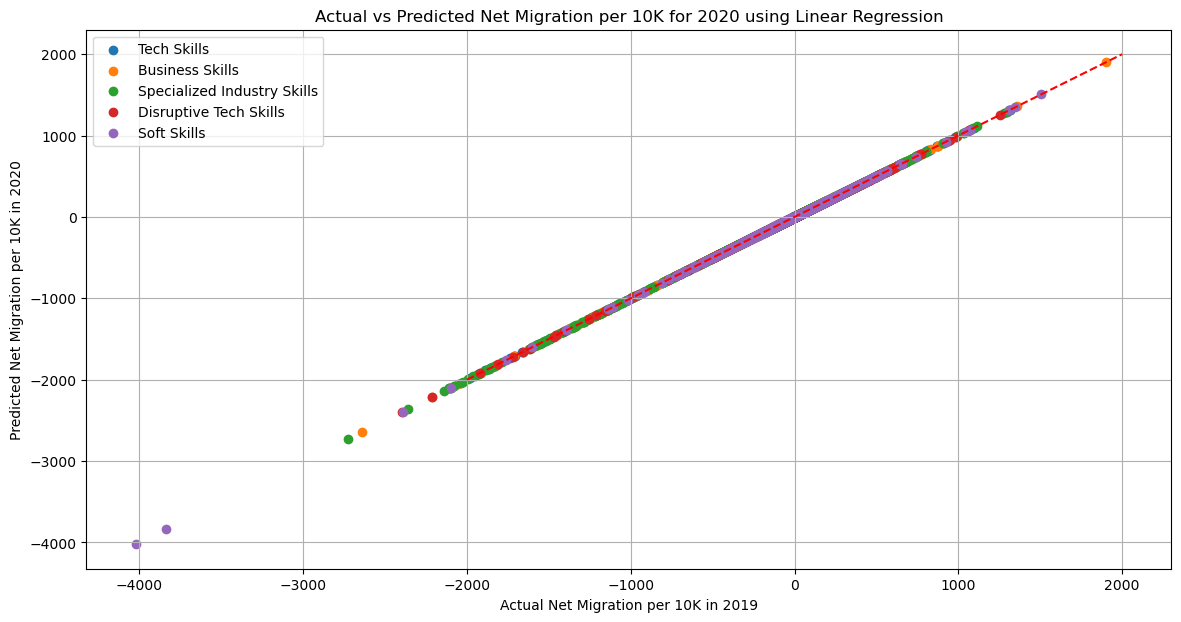

In [39]:
# Plotting the results
plt.figure(figsize=(14, 7))
for skill in prediction_results["skill_group_category"].unique():
    subset = prediction_results[prediction_results['skill_group_category'] == skill]
    plt.scatter(subset["net_per_10K_2019"], subset["net_per_10K_2020_pred"], label=skill)

plt.plot([-2000, 2000], [-2000, 2000], color='red', linestyle='--')  # Reference line
plt.title('Actual vs Predicted Net Migration per 10K for 2020 using Linear Regression')
plt.xlabel('Actual Net Migration per 10K in 2019')
plt.ylabel('Predicted Net Migration per 10K in 2020')
plt.legend()
plt.grid(True)
plt.show()